In [1]:
import pandas as pd;
import numpy as np;
import os;
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
#from sklearn.linear_models import LinearRegression,BayesianRidge


In [4]:
sales = pd.read_csv("prepared.csv")

In [5]:
sales.columns

Index(['Unnamed: 0', 'Time_to_customer', 'price', 'quantity', 'Year',
       'Week_Num', 'customer_zip_code_prefix', 'customer_city_x',
       'customer_state_x', 'customer_city_y', 'customer_state_y', 'category',
       'day', 'month'],
      dtype='object')

In [6]:
sales = pd.concat([sales,pd.get_dummies(sales['category'])],axis=1)
sales = pd.concat([sales,pd.get_dummies(sales['day'])],axis=1)
sales =sales.drop(['category','day'],axis=1)
#sales = pd.concat([sales,pd.get_dummies(sales['customer_state_x'])],axis=1)
sales =sales.drop(['customer_state_x','customer_zip_code_prefix','customer_city_x','customer_city_y','customer_state_y'],axis=1)
sales =sales.dropna()
sales = sales.drop(['Unnamed: 0'],axis=1)

In [7]:
sales

,Time_to_customer,price,quantity,Year,Week_Num,month,agro_industry_and_commerce,air_conditioning,art,audio,...,telephony,toys,watches_gifts,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,13.0,118.7,1,2018,30,7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13.0,118.7,1,2018,30,7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5.0,116.9,1,2018,32,8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5.0,116.9,1,2018,32,8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5.0,116.9,1,2018,32,8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350263,6.0,187.0,1,2018,23,6,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
350264,6.0,187.0,1,2018,23,6,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
350265,6.0,187.0,1,2018,23,6,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
350266,8.0,188.0,1,2018,19,5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
Y = sales['quantity']
X = sales.drop(['quantity'],axis=1)
filtered = ['Wednesday','watches_gifts','furniture_decor','Thursday','Tuesday','garden_tools','Friday','Time_to_customer'
           ,'Week_Num','price']
X = X[filtered]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 101)
X

,Wednesday,watches_gifts,furniture_decor,Thursday,Tuesday,garden_tools,Friday,Time_to_customer,Week_Num,price
0,0,0,0,0,1,0,0,13.0,30,118.7
1,0,0,0,0,1,0,0,13.0,30,118.7
2,0,0,0,1,0,0,0,5.0,32,116.9
3,0,0,0,1,0,0,0,5.0,32,116.9
4,0,0,0,1,0,0,0,5.0,32,116.9
...,...,...,...,...,...,...,...,...,...,...
350263,0,0,0,0,0,0,0,6.0,23,187.0
350264,0,0,0,0,0,0,0,6.0,23,187.0
350265,0,0,0,0,0,0,0,6.0,23,187.0
350266,0,0,0,1,0,0,0,8.0,19,188.0


In [9]:
from sklearn import metrics

def summary_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### Decision Tree

In [10]:
from sklearn.model_selection import cross_validate

In [14]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
#cv = cross_validate(regtree,X,Y,scoring=['r2'],cv=3)
clf = clf.fit(X_Train,Y_Train)
pred = clf.predict(X_Test)
summary_results(Y_Test,pred)
#df22 = pd.DataFrame(columns=['Test','Pred'])
#df22['Test'] = Y_Test
#df22['Pred'] =pred
#df22[df22['Test']!=df22['Pred']]
cv

explained_variance:  0.9558
r2:  0.9558
MAE:  0.0596
MSE:  0.2126
RMSE:  0.4611


{'fit_time': array([0.40637517, 0.40999579, 0.37925243]),
 'score_time': array([0.01285577, 0.01155138, 0.01161814]),
 'test_r2': array([ 0.05253598, -0.40407203, -2.11746142])}

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [16]:
print(tf.__version__)

2.3.1


In [17]:
X_train_vals = X_Train.values.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_test_vals = X_Test.values.reshape((X_Test.shape[0], 1, X_Test.shape[1]))


In [18]:
model = keras.Sequential()
model.add(layers.LSTM(500,return_sequences=False, input_shape=(X_train_vals.shape[1], X_train_vals.shape[2])))
model.add(layers.Dense(500))
model.add(layers.Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 500)               1022000   
_________________________________________________________________
dense (Dense)                (None, 500)               250500    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 1,273,001
Trainable params: 1,273,001
Non-trainable params: 0
_________________________________________________________________


Epoch 1/80
8073/8073 - 89s - loss: 0.8868 - val_loss: 0.8385
Epoch 2/80
8073/8073 - 94s - loss: 0.8242 - val_loss: 0.8093
Epoch 3/80
8073/8073 - 99s - loss: 0.8047 - val_loss: 0.7968
Epoch 4/80
8073/8073 - 123s - loss: 0.7909 - val_loss: 0.7844
Epoch 5/80
8073/8073 - 123s - loss: 0.7807 - val_loss: 0.7780
Epoch 6/80
8073/8073 - 127s - loss: 0.7740 - val_loss: 0.7671
Epoch 7/80
8073/8073 - 122s - loss: 0.7685 - val_loss: 0.7604
Epoch 8/80
8073/8073 - 90s - loss: 0.7638 - val_loss: 0.7613
Epoch 9/80
8073/8073 - 73s - loss: 0.7594 - val_loss: 0.7545
Epoch 10/80
8073/8073 - 63s - loss: 0.7557 - val_loss: 0.7509
Epoch 11/80
8073/8073 - 63s - loss: 0.7522 - val_loss: 0.7436
Epoch 12/80
8073/8073 - 63s - loss: 0.7491 - val_loss: 0.7472
Epoch 13/80
8073/8073 - 63s - loss: 0.7459 - val_loss: 0.7417
Epoch 14/80
8073/8073 - 63s - loss: 0.7431 - val_loss: 0.7423
Epoch 15/80
8073/8073 - 63s - loss: 0.7403 - val_loss: 0.7368
Epoch 16/80
8073/8073 - 63s - loss: 0.7374 - val_loss: 0.7376
Epoch 17/80
8

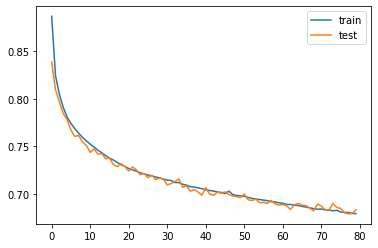

In [20]:
basic_history = model.fit(
    X_train_vals, 
    Y_Train.values, 
    epochs=80, 
    batch_size=30,
    validation_data=(X_test_vals, Y_Test.values),
    verbose=2,
    shuffle=False
)



def plot_history(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

plot_history(basic_history)

In [21]:
model.save("lstm_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: lstm_model/assets


In [22]:
re_model = keras.models.load_model("lstm_model")

In [41]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, 
                                                    random_state = 101)
X_train_vals = X_Train.values.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_test_vals = X_Test.values.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

re_model.fit(X_train_vals,Y_Train.values)

7568/7568 [==============================] - 54s 7ms/step - loss: 0.6745


In [43]:
re_model.save("lstm_model")

INFO:tensorflow:Assets written to: lstm_model/assets


In [42]:
summary_results(Y_Test.values,re_model.predict(X_test_vals))


explained_variance:  0.5941
r2:  0.5484
MAE:  0.681
MSE:  2.1703
RMSE:  1.4732


In [62]:
Y_Test.shape

(103791,)

In [108]:
re_model.predict(X_test_vals).shape

(103791, 500)